<a href="https://colab.research.google.com/github/adigenova/multiomics_training/blob/main/Multi_Omic_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOFA Tutorial


Several MOFA tutorials area available here : https://biofam.github.io/MOFA2/tutorials.html


## Installing packages

In [1]:
 install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
BiocManager::install("MOFA2")
install.packages("psych")
install.packages("ggpubr")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'MOFA2'

also installing the dependencies ‘zlibbioc’, ‘matrixStats’, ‘XVector’, ‘abind’, ‘RcppEigen’, ‘BH’, ‘sitmo’, ‘filelock’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘plyr’, ‘RcppTOML’, ‘here’, ‘png’, ‘SparseArray’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘S4Arrays’, ‘MatrixGenerics’, ‘FNN’, ‘irlba’, ‘RcppAnnoy’, ‘RSpectra’, ‘dqrng’, ‘RcppProgress’, ‘dir.expiry’, ‘basilisk.utils’, ‘rhdf5’, ‘reshape2’, ‘pheatmap’, ‘cowplot’, ‘ggrepel’, ‘reticulate’, ‘HDF5Array’, ‘corrplot’, ‘DelayedArray’, ‘Rtsne’, ‘uwot’, ‘basilisk’


Old packages: 'evaluate', 'foreign', 'openssl', 'Rcpp', 'testthat'



In [5]:
BiocManager::install("MOFAdata")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'MOFAdata'

Old packages: 'evaluate', 'foreign', 'openssl', 'Rcpp', 'testthat'



## MOFA and associated libraries

In [6]:
library(MOFA2)
library(MOFAdata)
library(data.table)
library(ggplot2)
library(tidyverse)
library("psych")
library("ggpubr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday()    masks data.table::wd

### Getting an initial dataset

 The data consists of four omics including DNA methylation, RNA-seq, somatic mutations and drug response data from blood for N=200 patients with Chronic Lymphocytic Leukemia.

In [7]:
utils::data("CLL_data")
lapply(CLL_data,dim)

$Drugs
[1] 310 200

$Methylation
[1] 4248  200

$mRNA
[1] 5000  200

$Mutations
[1]  69 200

related metadata including:

1. Gender: m (male), f (female)
2. Age: age in years
3. TTT: time (in years) which passed from taking the sample to the next treatment
4. TTD: time (in years) which passed from taking the sample to patients’ death
5. treatedAfter: (TRUE/FALSE)
6. Died: whether the patient died (TRUE/FALSE)

In [8]:
CLL_metadata <- fread("ftp://ftp.ebi.ac.uk/pub/databases/mofa/cll_vignette/sample_metadata.txt")

In [10]:
head(CLL_metadata)

sample,Gender,age,TTT,TTD,treatedAfter,died,IGHV,trisomy12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<int>
H005,m,75.26575,0.57494867,2.625599,TRUE,FALSE,1,0
H006,m,NA,NA,NA,NA,NA,NA,NA
H007,f,NA,NA,NA,NA,NA,NA,NA
H008,m,NA,NA,NA,NA,NA,NA,NA
H010,f,72.78082,2.93223819,2.932238,FALSE,FALSE,0,0
H011,f,72.99452,0.01916496,2.951403,TRUE,FALSE,1,0


 ## Preparing MOFA run

In [11]:
MOFAobject <- create_mofa(CLL_data)
MOFAobject

Creating MOFA object from a list of matrices (features as rows, sample as columns)...




Untrained MOFA model with the following characteristics: 
 Number of views: 4 
 Views names: Drugs Methylation mRNA Mutations 
 Number of features (per view): 310 4248 5000 69 
 Number of groups: 1 
 Groups names: group1 
 Number of samples (per group): 200 
 

### Data Overview
Visualise the number of views (rows) and the number of groups (columns) exist, what are their corresponding dimensionalities and how many missing information they have (grey bars).

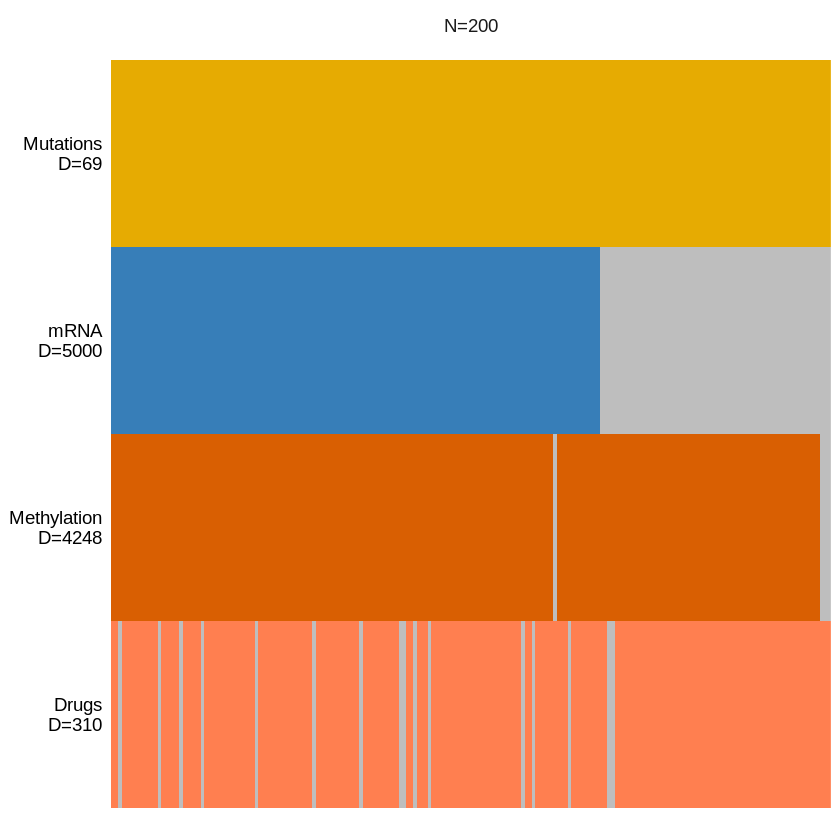

In [12]:
plot_data_overview(MOFAobject)

### MOFA options

#### Data options


In [13]:
data_opts <- get_default_data_options(MOFAobject)
data_opts


$scale_views
[1] FALSE

$scale_groups
[1] FALSE

$center_groups
[1] TRUE

$use_float32
[1] TRUE

$views
[1] "Drugs"       "Methylation" "mRNA"        "Mutations"  

$groups
[1] "group1"

#### Model options

- num_factors: number of factors
- likelihoods: likelihood per view (options are “gaussian”, “poisson”, “bernoulli”). By default they are inferred automatically.
- spikeslab_factors: use spike-slab sparsity prior in the factors? default is FALSE.
- spikeslab_weights: use spike-slab sparsity prior in the weights? default is TRUE.
- ard_factors: use ARD prior in the factors? Default is TRUE if using multiple groups.
- ard_weights: use ARD prior in the weights? Default is TRUE if using multiple views.

In [14]:
model_opts <- get_default_model_options(MOFAobject)
# number of latent factors
model_opts$num_factors <- 15

model_opts

$likelihoods
      Drugs Methylation        mRNA   Mutations 
 "gaussian"  "gaussian"  "gaussian"  "gaussian" 

$num_factors
[1] 15

$spikeslab_factors
[1] FALSE

$spikeslab_weights
[1] FALSE

$ard_factors
[1] FALSE

$ard_weights
[1] TRUE

#### Training options

- maxiter: number of iterations. Default is 1000.
- convergence_mode: “fast”, “medium” (default), “slow”. For exploration, the fast mode is good enough.
- seed: random seed


In [15]:
train_opts <- get_default_training_options(MOFAobject)
train_opts$convergence_mode <- "slow"
train_opts$seed <- 42

train_opts


$maxiter
[1] 1000

$convergence_mode
[1] "slow"

$drop_factor_threshold
[1] -1

$verbose
[1] FALSE

$startELBO
[1] 1

$freqELBO
[1] 5

$stochastic
[1] FALSE

$gpu_mode
[1] FALSE

$gpu_device
NULL

$seed
[1] 42

$outfile
NULL

$weight_views
[1] FALSE

$save_interrupted
[1] FALSE

### Train the MOFA model



In [16]:
MOFAobject <- prepare_mofa(MOFAobject,
  data_options = data_opts,
  model_options = model_opts,
  training_options = train_opts
)

Checking data options...

Checking training options...

Checking model options...



In [19]:
# outfile = file.path(getwd(),"model_CLL.hdf5")
# MOFAobject.trained <- run_mofa(MOFAobject, outfile)

# Load precomputed model
MOFAobject <- readRDS(url("http://ftp.ebi.ac.uk/pub/databases/mofa/cll_vignette/MOFA2_CLL.rds"))

### Overview of the trained MOFA model

#### Slots

The MOFA object consists of multiple slots where relevant data and information is stored. For descriptions, you can read the documentation using ?MOFA. The most important slots are:

- data: input data used to train the model (features are centered at zero mean)
- samples_metadata: sample metadata information
- expectations: expectations of the posterior distributions for the Weights and the Factors


In [20]:
slotNames(MOFAobject)

[1] "data"               "covariates"         "covariates_warped" 
 [4] "intercepts"         "imputed_data"       "interpolated_Z"    
 [7] "samples_metadata"   "features_metadata"  "expectations"      
[10] "training_stats"     "data_options"       "model_options"     
[13] "training_options"   "stochastic_options" "mefisto_options"   
[16] "dimensions"         "on_disk"            "dim_red"           
[19] "cache"              "status"

In [21]:
names(MOFAobject@data)
names(MOFAobject@expectations)

[1] "Drugs"       "Methylation" "mRNA"        "Mutations"

[1] "Z" "W"

In [22]:
# Dimensionality of the factor matrix: 200 samples, 15 factors
dim(MOFAobject@expectations$Z$group1)
# Dimensionality of the mRNA Weight matrix: 5000 features, 15 factors
dim(MOFAobject@expectations$W$mRNA)


[1] 200  15

[1] 5000   15

Add sample metadata

In [23]:
# Sanity check
stopifnot(all(sort(CLL_metadata$sample)==sort(unlist(samples_names(MOFAobject)))))
samples_metadata(MOFAobject) <- CLL_metadata


### Correlation between factors

A good sanity check is to verify that the Factors are largely uncorrelated. In MOFA there are no orthogonality constraints such as in Principal Component Analysis, but if there is a lot of correlation between Factors this suggests a poor model fit. Reasons? Perhaps you used too many factors or perhaps the normalisation is not adequate.


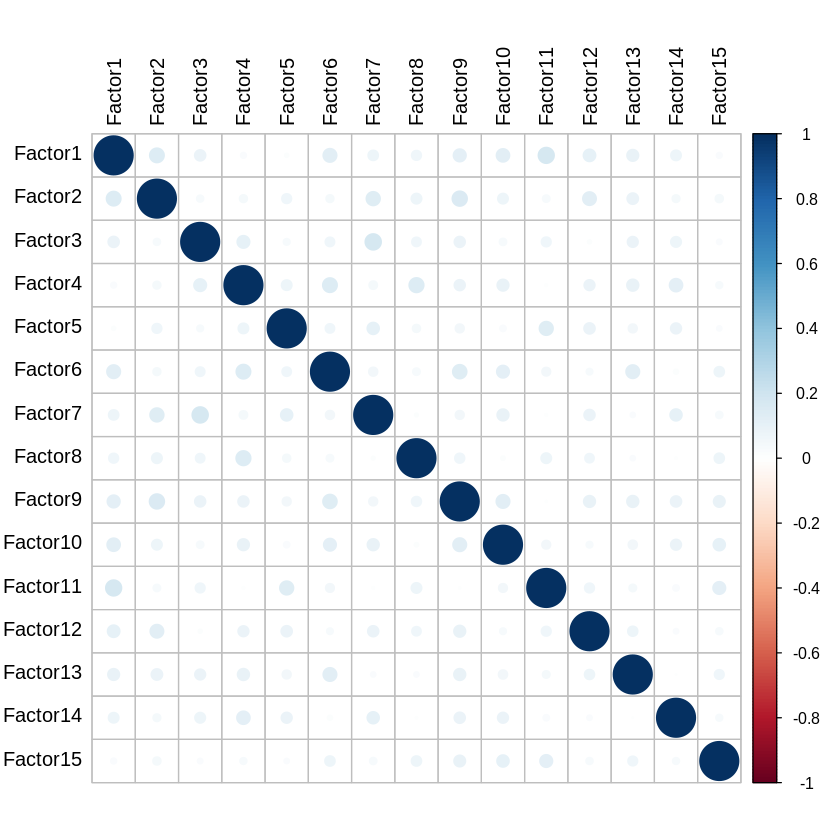

In [24]:
plot_factor_cor(MOFAobject)

In [ ]:
### Plot variance decomposition

#### Variance decomposition by Factor
The most important insight that MOFA generates is the variance decomposition analysis.
This plot shows the percentage of variance explained by each factor across each data modality (and group, if provided).
It summarises the sources of variation from a complex heterogeneous data set in a single figure.



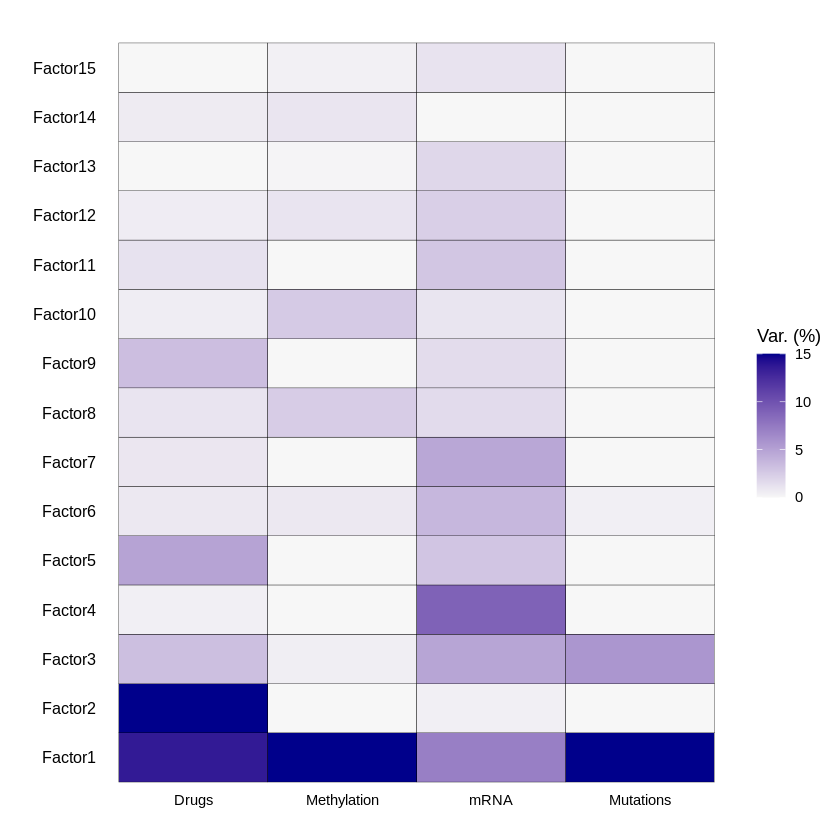

In [25]:
plot_variance_explained(MOFAobject, max_r2=15)

- Factor **1** captures a source of variability that is present across all data modalities. Thus, its etiology is likely to be something very important for the disease
- Factor **2** captures a very strong source of variation that is exclusive to the drug response data.
- Factor **3** captures variation that is present across multiple data modalities, except for DNA methylation. This is likely to be important too.
- Factor **5** is capturing some co-variation between the mRNA and the drug response assay.

### Total variance explained per view

A reasonable question is whether the model is providing a good fit to the data. For this we can plot the total variance explained (using all factors). The resulting values will depend on the nature of the data set, the number of samples, the number of factors, etc. Some general guidelines:

- Noisy data sets with strong non-linearities will result in small amounts of variance explained (<10%).
- The higher the number of samples the smaller the total variance explained
- The higher the number of factors, the higher the total variance explained.
- MOFA is a linear and sparse model. This is helpful to prevent overfitting, but it will never explain 100% of the variance, even if using a lot of Factors.



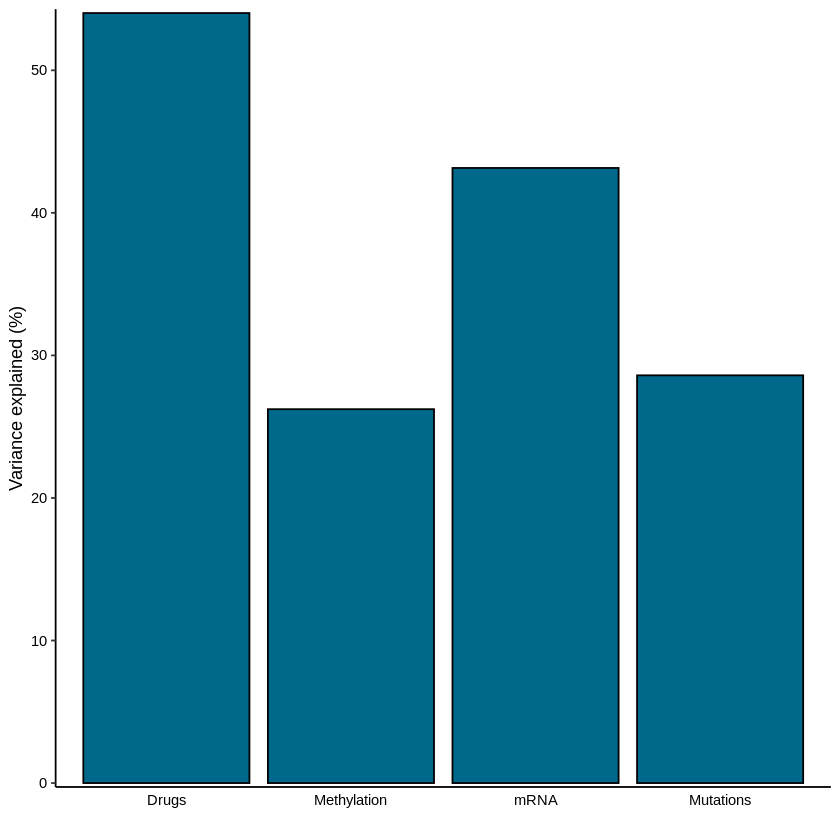

In [26]:
plot_variance_explained(MOFAobject, plot_total = T)[[2]]

### Factor characterization

There are a few systematic strategies to characterise the molecular etiology underlying the MOFA Factors and to relate them to the sample covariates:

1. Association analysis between the sample metadata and the Factor values.
2. Inspection of factor values.
4. Inspection of the feature weights.
4. Gene set enrichment analysis on the mRNA weights.

Warning message in correlate_factors_with_covariates(MOFAobject, covariates = c("Gender", :
“There are non-numeric values in the covariates data.frame, converting to numeric...”


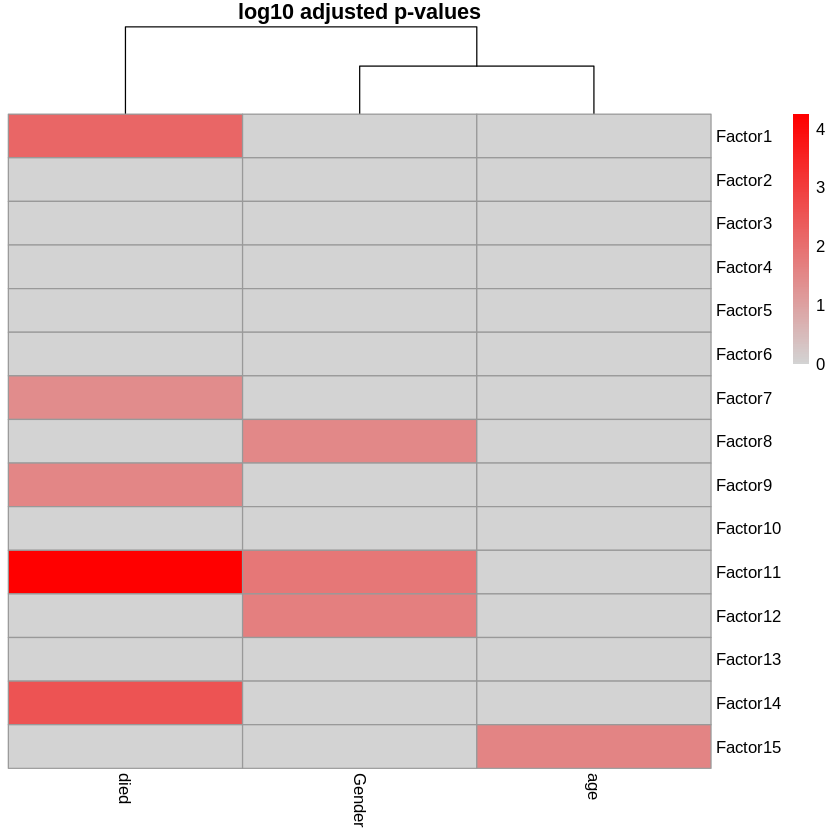

In [31]:
correlate_factors_with_covariates(MOFAobject,
  covariates = c("Gender","died","age"),
  plot="log_pval"
)

Factor 11 has a small association with survival outcome.

### Plot factor values
- How do we interpret the factor values?
Each factor captures a different source of variability in the data. Mathematically, each Factor is defined by a linear combination of the input features. As the data is centered prior to running MOFA, each Factor ordinates cells along a one-dimensional axis that is centered at zero. Samples with different signs manifest opposite phenotypes along the inferred axis of variation, with higher absolute value indicating a stronger effect.
- Note that the interpretation of MOFA factors is analogous to the interpretation of the principal components in PCA.

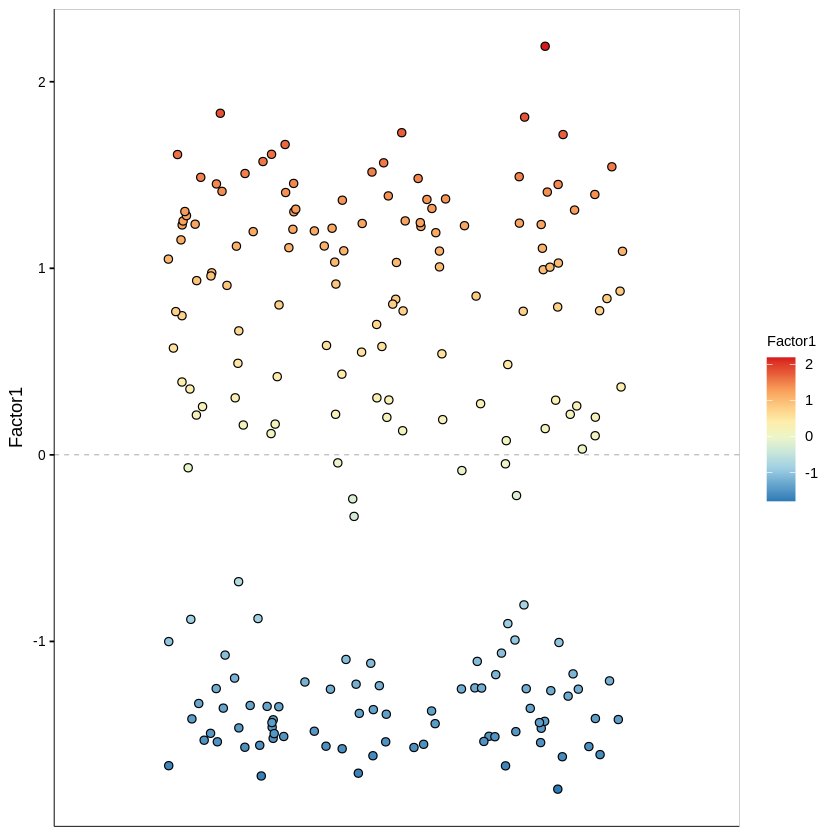

In [32]:
plot_factor(MOFAobject,
  factors = 1,
  color_by = "Factor1"
)

- How do we interpret the weights?
The weights provide a score for each feature on each factor.
- Features with no association with the corresponding factor are expected to have values close to zero, whereas features with strong association with the factor are expected to have large absolute values.
- The sign of the weights indicates the direction of the effect: a positive weights indicates that the feature has higher levels in the cells with positive factor values, and vice-versa.

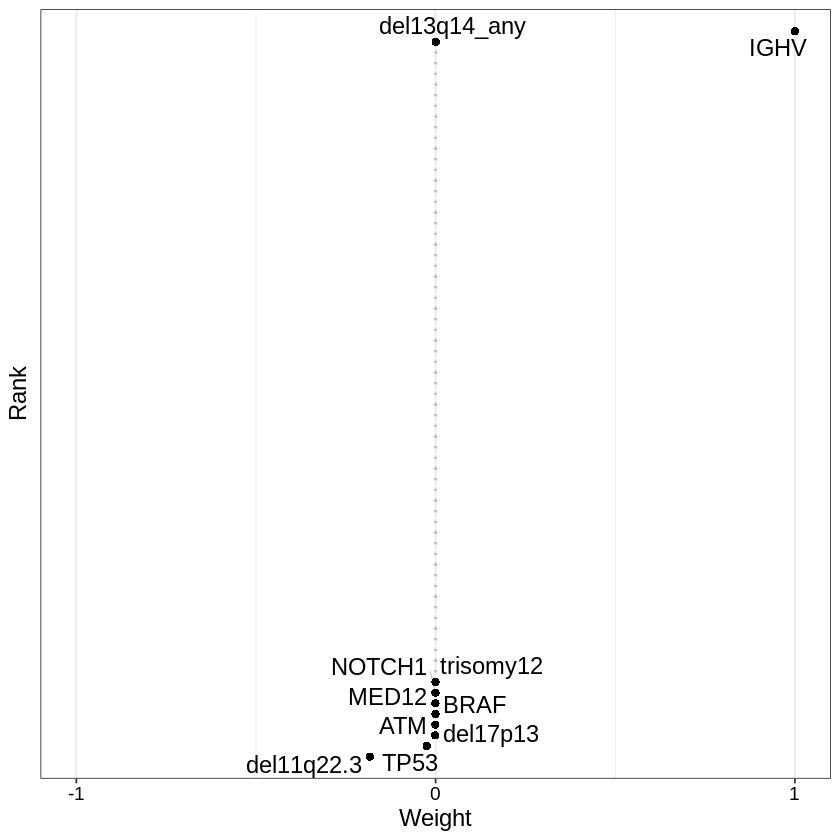

In [33]:
plot_weights(MOFAobject,
 view = "Mutations",
 factor = 1,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

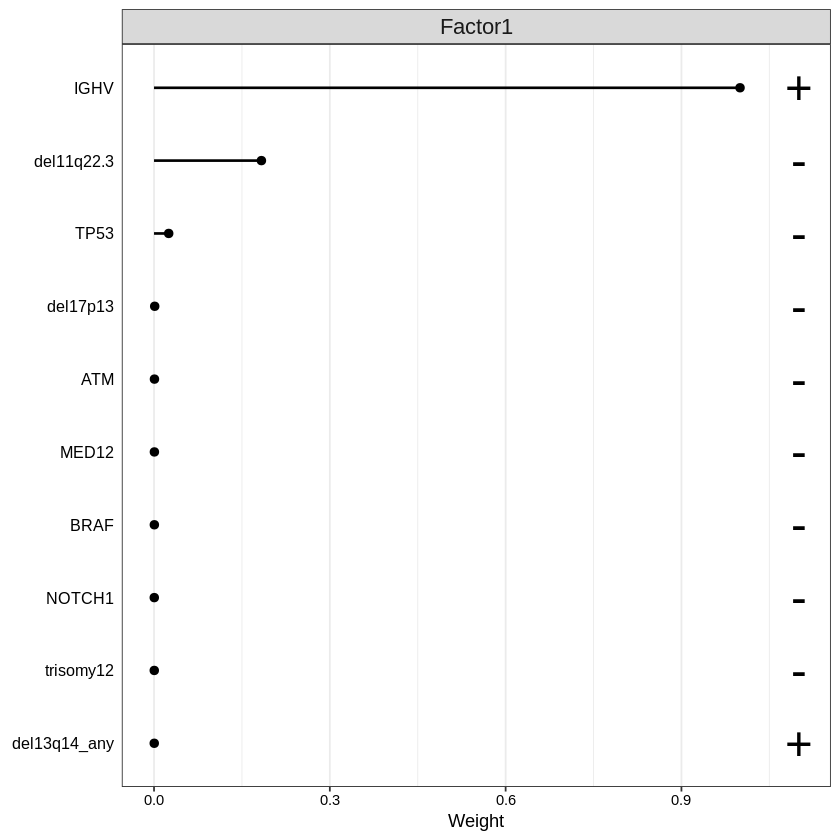

In [34]:
plot_top_weights(MOFAobject,
 view = "Mutations",
 factor = 1,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

 - IGHV (immunoglobulin heavy chain variable region) is the main clinical marker for CLL.
 - IGHV has a positve weight. This means that samples with positive Factor 1 values have IGHV mutation whereas samples with negative Factor 1 values do not have the IGHV mutation.


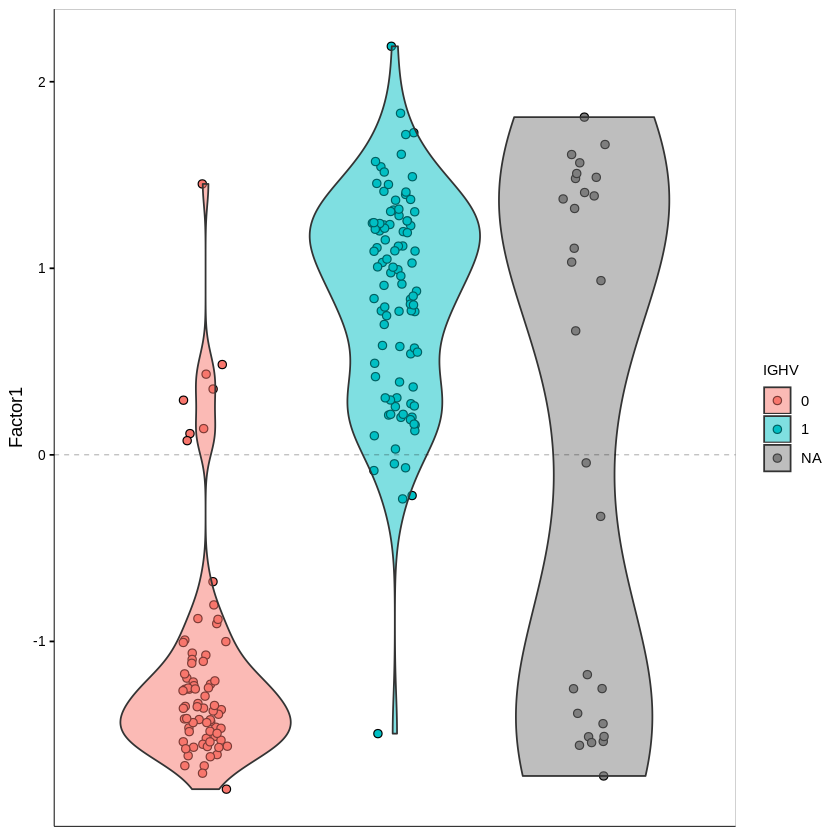

In [35]:
plot_factor(MOFAobject,
  factors = 1,
  color_by = "IGHV",
  add_violin = TRUE,
  dodge = TRUE
)


We know that Factor 1 drives variation across all data modalities. Let’s visualise the mRNA expression changes that are associated with Factor 1

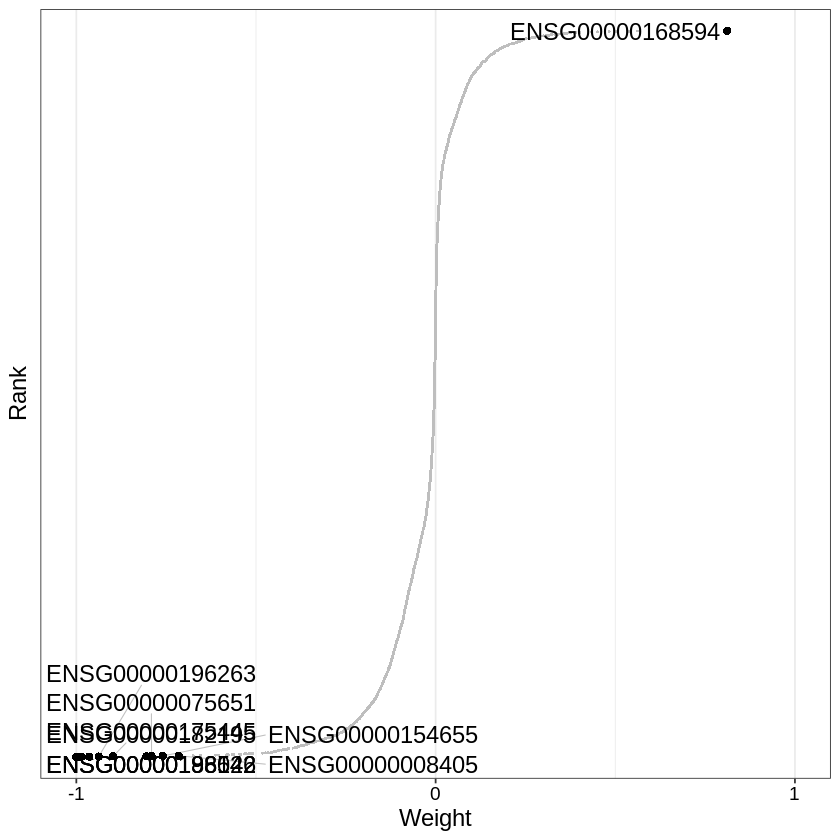

In [36]:
plot_weights(MOFAobject,
  view = "mRNA",
  factor = 1,
  nfeatures = 10
)

- Genes with large positive values will be more expressed in the samples with IGHV mutation, whereas genes with large negative values will be more expressed in the samples without the IGHV mutation

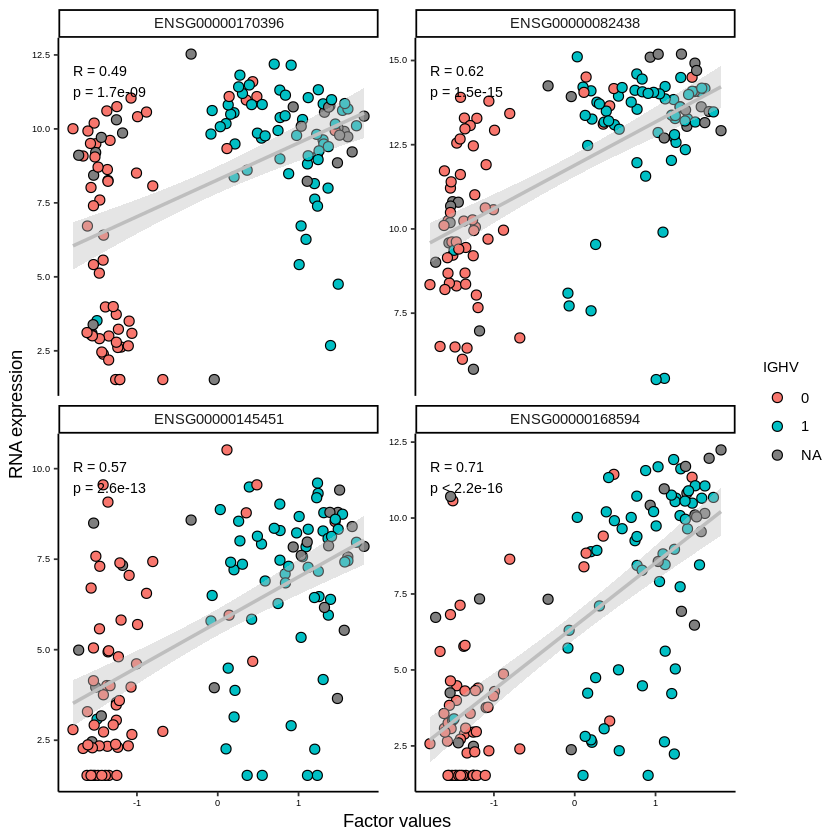

In [39]:
plot_data_scatter(MOFAobject,
  view = "mRNA",
  factor = 1,
  features = 4,
  sign = "positive",
  color_by = "IGHV"
) + labs(y="RNA expression")

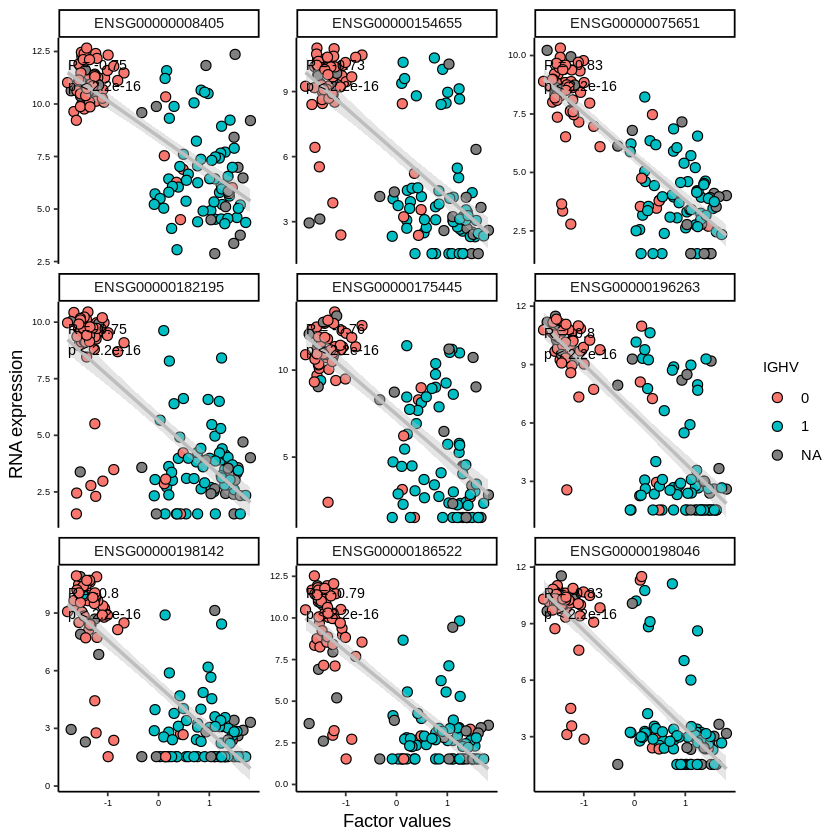

In [41]:
plot_data_scatter(MOFAobject,
  view = "mRNA",
  factor = 1,
  features = 9,
  sign = "negative",
  color_by = "IGHV"
) + labs(y="RNA expression")

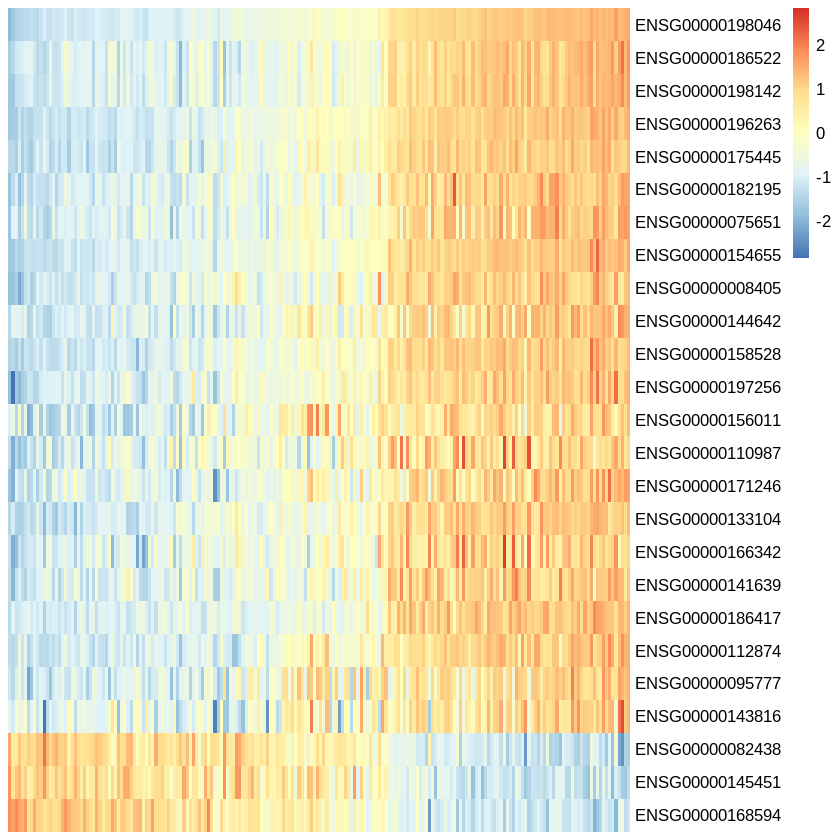

In [42]:
plot_data_heatmap(MOFAobject,
  view = "mRNA",
  factor = 1,
  features = 25,
  denoise = TRUE,
  cluster_rows = FALSE, cluster_cols = FALSE,
  show_rownames = TRUE, show_colnames = FALSE,
  scale = "row"
)

### Factor combinations



Warning message:
“Removed 27 rows containing missing values or values outside the scale range
(`geom_point()`).”


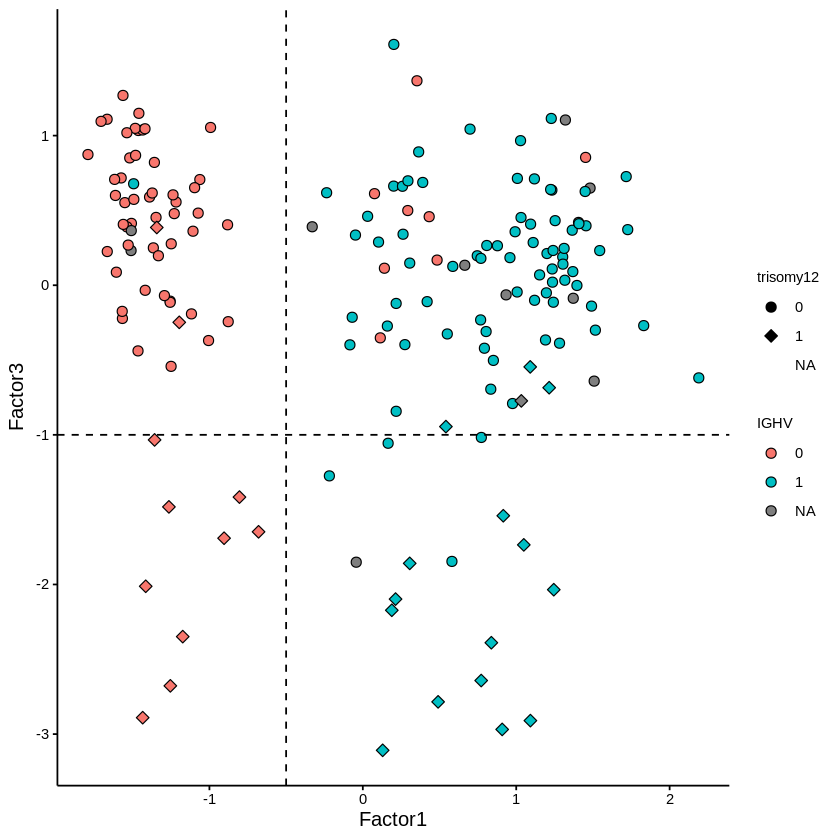

In [43]:
p <- plot_factors(MOFAobject,
  factors = c(1,3),
  color_by = "IGHV",
  shape_by = "trisomy12",
  dot_size = 2.5,
  show_missing = T
)

p <- p +
  geom_hline(yintercept=-1, linetype="dashed") +
  geom_vline(xintercept=(-0.5), linetype="dashed")

print(p)

It classifies the patients into four different subgroups depending on their (multi-omic) molecular profile. As shown in the analysis above, both factors are associated with differences in the drug response assay they are are strongly linked to somatic mutations (IGHV and trisomy12) that are easy to profile in clinical practice.


### Enrichment Analysis

In [44]:
utils::data(reactomeGS)

head(colnames(reactomeGS))

[1] "ENSG00000187634" "ENSG00000188976" "ENSG00000187961" "ENSG00000187583"
[5] "ENSG00000187642" "ENSG00000188290"

In [45]:
head(rownames(reactomeGS))

[1] "Interleukin-6 signaling"                                  
[2] "Apoptosis"                                                
[3] "Hemostasis"                                               
[4] "Intrinsic Pathway for Apoptosis"                          
[5] "Cleavage of Growing Transcript in the Termination Region "
[6] "PKB-mediated events"

In [46]:
# GSEA on positive weights, with default options
res.positive <- run_enrichment(MOFAobject,
  feature.sets = reactomeGS,
  view = "mRNA",
  sign = "positive"
)

# GSEA on negative weights, with default options
res.negative <- run_enrichment(MOFAobject,
  feature.sets = reactomeGS,
  view = "mRNA",
  sign = "negative"
)

Intersecting features names in the model and the gene set annotation results in a total of 4982 features.


Running feature set Enrichment Analysis with the following options...
View: mRNA 
Number of feature sets: 501 
Set statistic: mean.diff 
Statistical test: parametric 


Subsetting weights with positive sign




Intersecting features names in the model and the gene set annotation results in a total of 4982 features.


Running feature set Enrichment Analysis with the following options...
View: mRNA 
Number of feature sets: 501 
Set statistic: mean.diff 
Statistical test: parametric 


Subsetting weights with negative sign






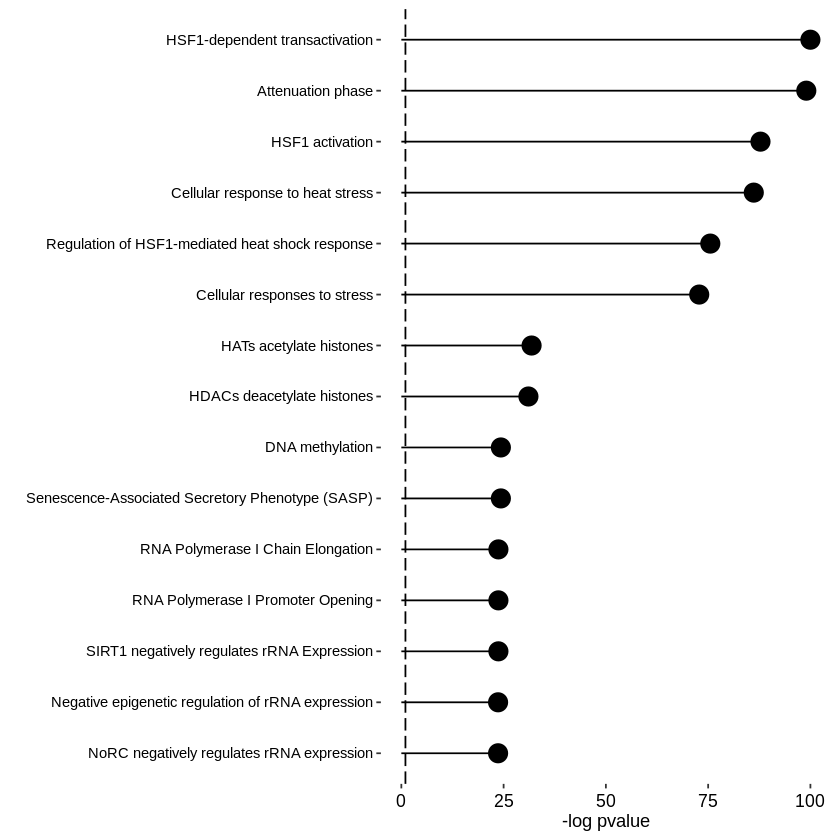

In [51]:
plot_enrichment(res.positive, factor = 5, max.pathways = 15)


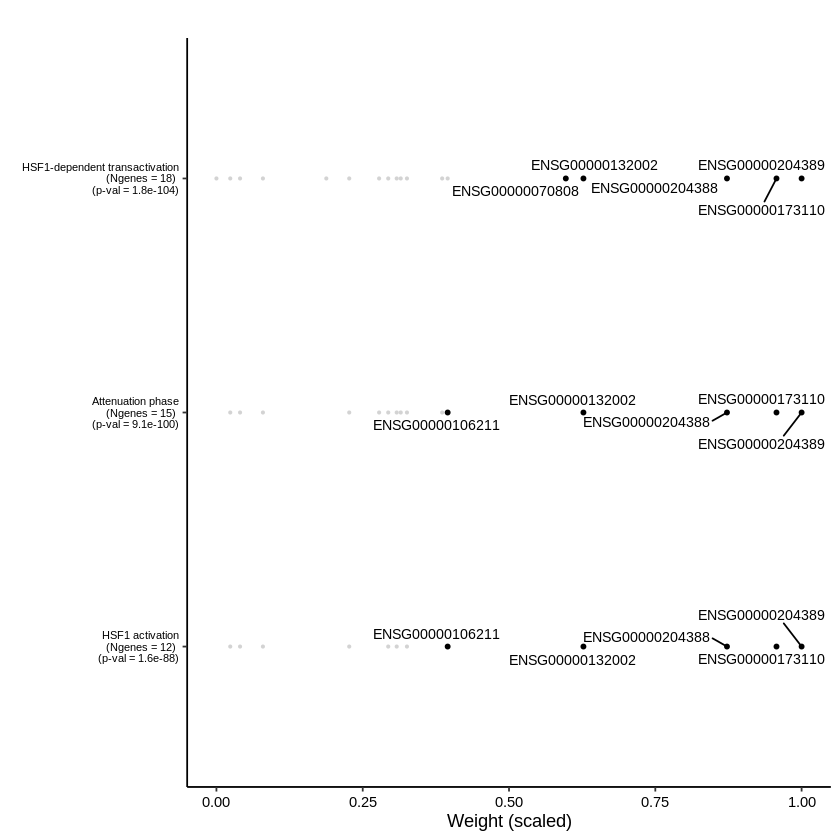

In [52]:
plot_enrichment_detailed(
  enrichment.results = res.positive,
  factor = 5,
  max.pathways = 3
)

## Custom Analysis

### Get MOFA factors


In [53]:
factors <- get_factors(MOFAobject,
  factors = "all",
  as.data.frame = TRUE
)
head(factors)

,sample,factor,value,group
,<chr>,<fct>,<dbl>,<chr>
1,H045,Factor1,-1.418579,group1
2,H109,Factor1,-1.415237,group1
3,H024,Factor1,1.663551,group1
4,H056,Factor1,1.224276,group1
5,H079,Factor1,-1.217420,group1
6,H164,Factor1,-1.791768,group1


In [54]:
head(CLL_data$mRNA)

,H045,H109,H024,H056,H079,H164,H059,H167,H113,H049,⋯,H178,H166,H174,H177,H259,H175,H179,H050,H180,H229
ENSG00000244734,4.558644,2.721512,9.938456,13.278004,6.086874,2.571839,4.938961,1.528848,2.286122,2.504699,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000158528,11.741854,13.287432,2.341006,3.232874,11.940820,11.506818,5.483675,2.618869,2.812801,2.504699,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000198478,8.921456,2.721512,12.381452,8.106266,4.889503,12.756213,3.593890,4.119490,5.220041,2.884897,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000175445,12.686458,10.925985,1.528848,1.528848,13.340588,10.885547,11.194029,11.599981,2.286122,2.884897,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000174469,2.644946,12.648355,1.528848,13.565210,5.476914,10.975187,7.944246,2.618869,2.286122,12.940957,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ENSG00000188536,2.644946,1.528848,6.664661,9.580385,3.862678,2.571839,3.177357,1.528848,1.528848,1.528848,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Assigment

1. Compute a PCA from the CLL_data$mRNA and compare the  correlation of latent factors between MOFA and PCA.